# cost analysis

## 💰 Average Initial Renovation Cost by Borough

This chart shows the average declared renovation cost for each borough across all years.

### ✅ Why this matters:
- Highlights where more capital is spent per job.
- May correlate with luxury renovations, building size, or neighborhood value.
- Can guide premium targeting for construction suppliers and service providers.

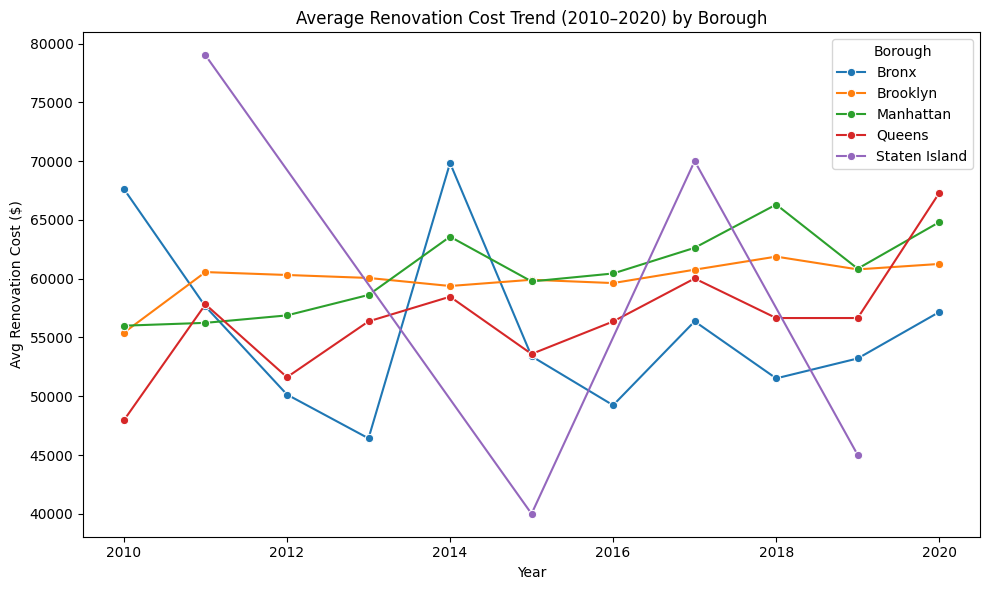

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned data
df = pd.read_csv('../data/processed_data/apartment_cleaned.csv')


# Drop missing or malformed cost values
df_cost = df[df['Initial Cost'].notna()].copy()

# Convert to numeric (ensure dollar signs are removed)
df_cost['Initial Cost'] = df_cost['Initial Cost'].replace('[\$,]', '', regex=True).astype(float)

# Group and calculate mean cost by borough
borough_avg_cost = df_cost.groupby('Borough')['Initial Cost'].mean().sort_values(ascending=False)
# Filter valid cost and permit date
df_trend = df[df['Initial Cost'].notna()].copy()
df_trend['Initial Cost'] = df_trend['Initial Cost'].replace('[\$,]', '', regex=True).astype(float)
df_trend['Fully Permitted'] = pd.to_datetime(df_trend['Fully Permitted'], errors='coerce')
df_trend = df_trend[df_trend['Fully Permitted'].dt.year.between(2010, 2020)]

# Add year column
df_trend['Year'] = df_trend['Fully Permitted'].dt.year

# Group by year and borough
cost_trend = df_trend.groupby(['Year', 'Borough'])['Initial Cost'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=cost_trend, x='Year', y='Initial Cost', hue='Borough', marker='o')
plt.title('Average Renovation Cost Trend (2010–2020) by Borough')
plt.ylabel('Avg Renovation Cost ($)')
plt.xlabel('Year')
plt.tight_layout()
plt.show()

### 📊 Observations:
- **Manhattan** shows both the **highest costs** and most **volatile trends**.
- **Brooklyn and Queens** show steady growth, reflecting gradual development.
- **Dips in 2019-2020** may reflect COVID-19 disruptions in filings or construction.
- Useful for cost projection and identifying **emerging growth areas**.

## 💰 Average Renovation Cost Trends by Borough (2010–2020)

This plot compares average renovation costs across NYC boroughs over a decade.

### ✅ Why this matters:
- Understand borough-wise cost fluctuations across years.
- Helps detect rising vs declining construction activity costs.
- Useful for budgeting, pricing, and supplier strategies.

### 📈 Interpretation:
- **Red dashed line** shows borough-level average renovation cost.
- **Vertical colored lines** show difference from the average:
  - **Green = Above Average**
  - **Red = Below Average**
- Use this to target areas with consistent high spend or recent spikes.


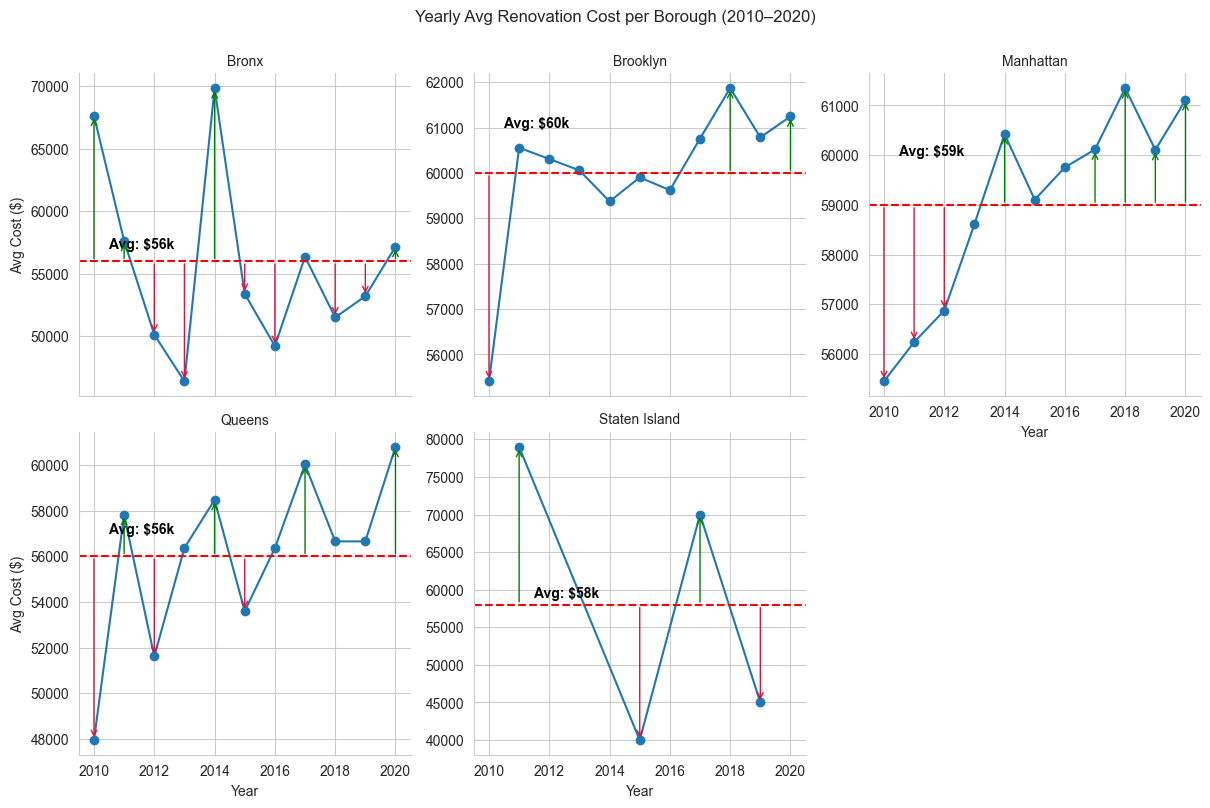

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the cleaned DataFrame (assumed already available as df)
df['Fully Permitted'] = pd.to_datetime(df['Fully Permitted'])
df['Year'] = df['Fully Permitted'].dt.year
df_cost = df[df['Year'].between(2010, 2020)].copy()

# Remove outliers beyond 99th percentile
upper_limit = df_cost['Initial Cost'].quantile(0.99)
df_cost = df_cost[df_cost['Initial Cost'] <= upper_limit]

# Group by year and borough
cost_by_year_borough = df_cost.groupby(['Year', 'Borough'])['Initial Cost'].mean().reset_index()

# Round average for annotation
avg_costs = cost_by_year_borough.groupby('Borough')['Initial Cost'].mean().apply(lambda x: round(x / 1000) * 1000).to_dict()

# Create FacetGrid
sns.set_style("whitegrid")
facet_plot = sns.FacetGrid(cost_by_year_borough, col='Borough', col_wrap=3, height=4, sharey=False)

def plot_with_avg(data, **kwargs):
    borough = data['Borough'].iloc[0]
    avg_line = avg_costs[borough]
    plt.plot(data['Year'], data['Initial Cost'], marker='o', **kwargs)
    plt.axhline(y=avg_line, linestyle='--', color='red', label=f'Avg: ${int(avg_line/1000)}k')
    plt.text(
        x=data['Year'].min() + 0.5, y=avg_line + 1000,
        s=f"Avg: ${int(avg_line/1000)}k",
        color='black', fontsize=10, fontweight='bold'
    )
    for _, row in data.iterrows():
        y = row['Initial Cost']
        if abs(y - avg_line) > 1000:
            plt.annotate(
                '', xy=(row['Year'], y), xytext=(row['Year'], avg_line),
                arrowprops=dict(arrowstyle="->", color='green' if y > avg_line else 'crimson')
            )

facet_plot.map_dataframe(plot_with_avg)
facet_plot.set_titles('{col_name}')
facet_plot.set_axis_labels('Year', 'Avg Cost ($)')
plt.subplots_adjust(top=0.9)
facet_plot.fig.suptitle('Yearly Avg Renovation Cost per Borough (2010–2020)')
plt.show()

## 💸 Renovation Cost Distribution by Borough

This plot shows how renovation costs vary within each borough.

### ✅ Why this matters:
- Helps spot high-cost outliers (potential large-scale projects)
- Identifies boroughs with tightly clustered vs highly spread cost ranges
- Useful for estimating expected renovation budgets

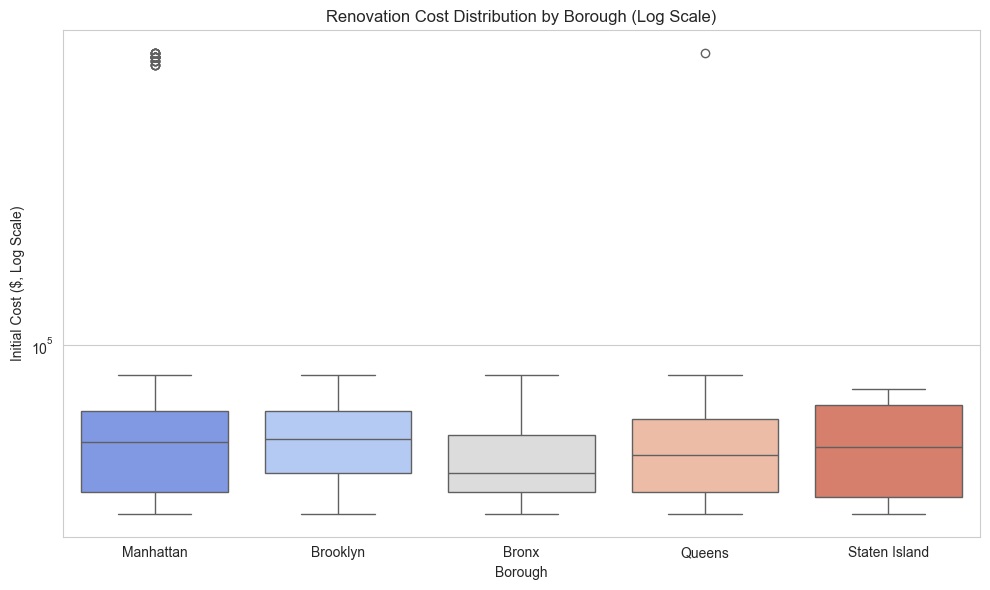

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter valid data
df_filtered = df[df['Year'].between(2010, 2020)].copy()
df_filtered['Initial Cost'] = pd.to_numeric(df_filtered['Initial Cost'], errors='coerce')
df_filtered = df_filtered.dropna(subset=['Initial Cost'])

# Plot boxplot with log scale and no warning
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_filtered,
    x='Borough',
    y='Initial Cost',
    hue='Borough',
    legend=False,
    palette='coolwarm'
)
plt.yscale('log')
plt.title('Renovation Cost Distribution by Borough (Log Scale)')
plt.xlabel('Borough')
plt.ylabel('Initial Cost ($, Log Scale)')
plt.tight_layout()
plt.show()


### 📦 What This Reveals (Boxplot Summary - Log Scale)

- The **log scale** helps reveal the spread of most renovation costs that would otherwise be hidden due to a few extreme outliers.
- **Manhattan** shows the **highest median renovation costs**, with a wider spread toward higher values.
- **Bronx and Staten Island** generally show **lower renovation costs**, with fewer high-cost outliers.
- The boxplot helps contractors and suppliers target pricing strategies by borough.

✅ This view supports pricing optimization and regional planning for material and workforce costs.
